In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [2]:
segment_directory = "data2/segmentation.csv"

segment = pd.read_csv(segment_directory, header=0 )

In [3]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [4]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerId  16000 non-null  object 
 1   Monetary    16000 non-null  float64
 2   Recency     16000 non-null  object 
 3   Frequency   16000 non-null  int64  
 4   factor_1    16000 non-null  float64
 5   factor_2    16000 non-null  float64
 6   factor_3    16000 non-null  float64
 7   factor_4    16000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1000.1+ KB


Запишем в список все графы, в которых тип данных числовой и посмотрим на их распределения

In [5]:
not_obj_features = ['Monetary', 'Frequency', 'factor_1', 'factor_2', 'factor_3', 'factor_4']

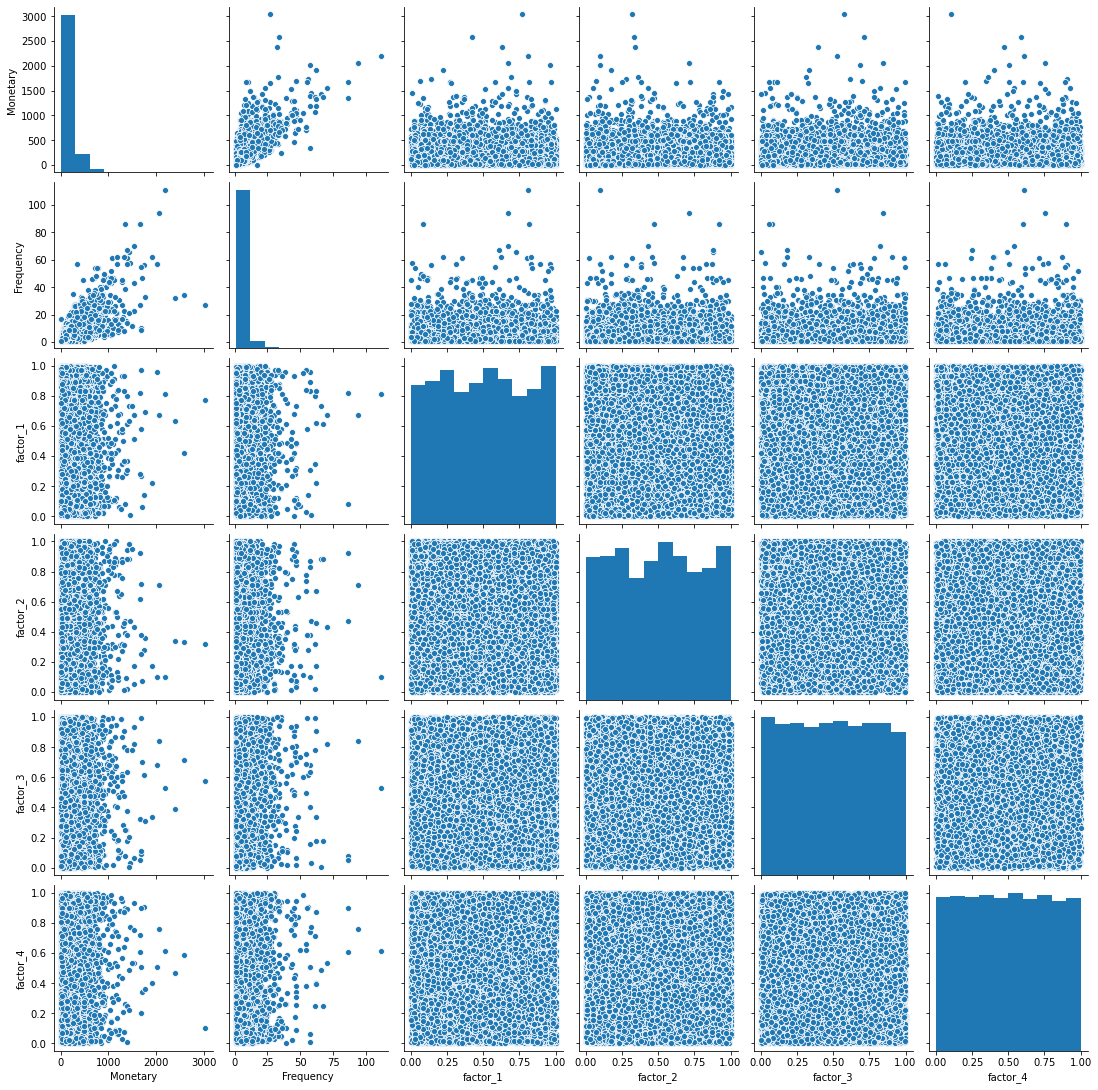

In [6]:
sns.pairplot(segment[not_obj_features]);

Видно, что factor_3 и factor_4 имеют практически равномерное распредление, а factor_1 и factor_2 близки к равномерному распределению

In [7]:
features = ['Monetary', 'Frequency'] #используем только эти свойства для кластеризации

In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(segment[not_obj_features].values) #используем not_obj_features чтобы отобразить потом в 3D
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99571126e-01 4.18500676e-04 2.64955726e-06]


KeyError: 'pca-one'

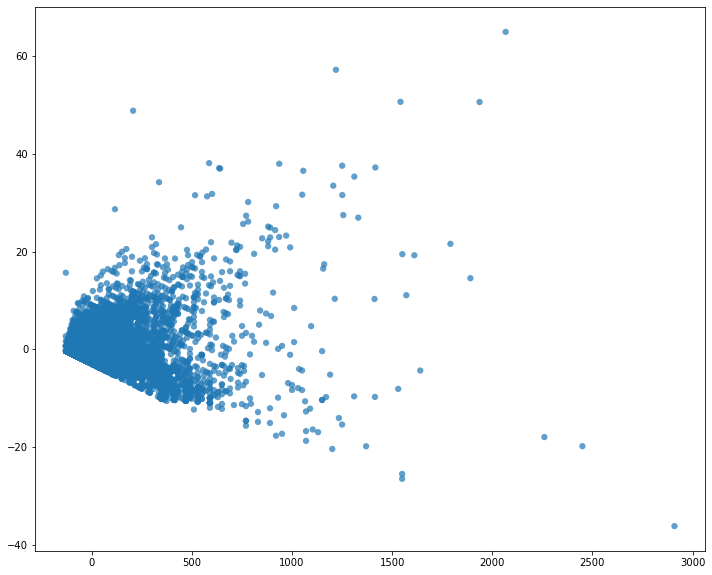

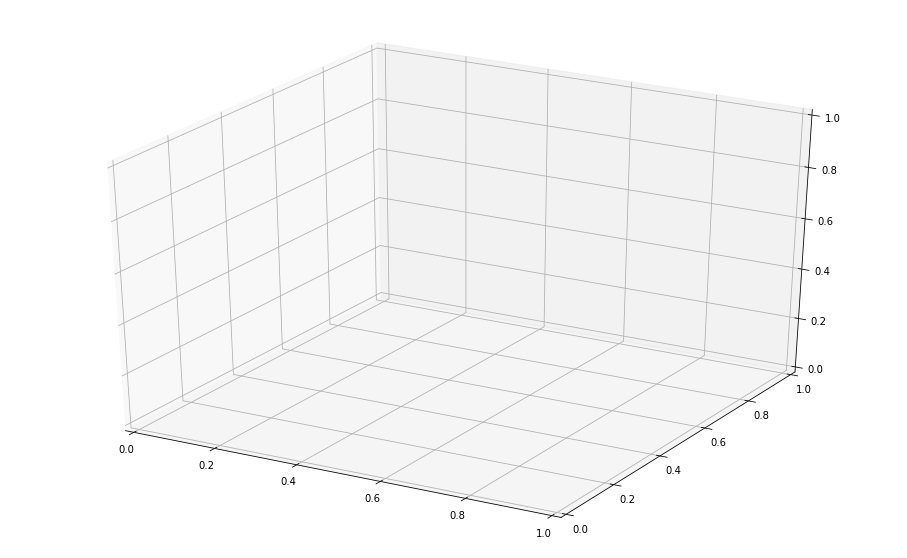

In [9]:
plt.figure(figsize=(12,10))
plt.scatter(pca_result[:, 0], pca_result[:, 1],  
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
rndperm = list(range(1,1000))

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=segment.loc[rndperm,:]["pca-one"], 
    ys=segment.loc[rndperm,:]["pca-two"], 
    zs=segment.loc[rndperm,:]["pca-three"], 
    
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

Для кластеризации используем KMeans с числом кластеров 3

Text(0, 0.5, 'factor_4')

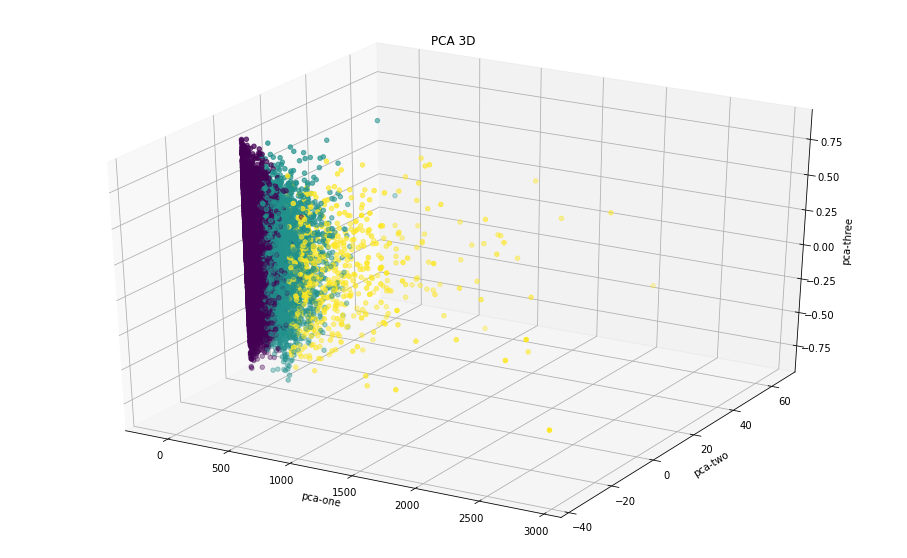

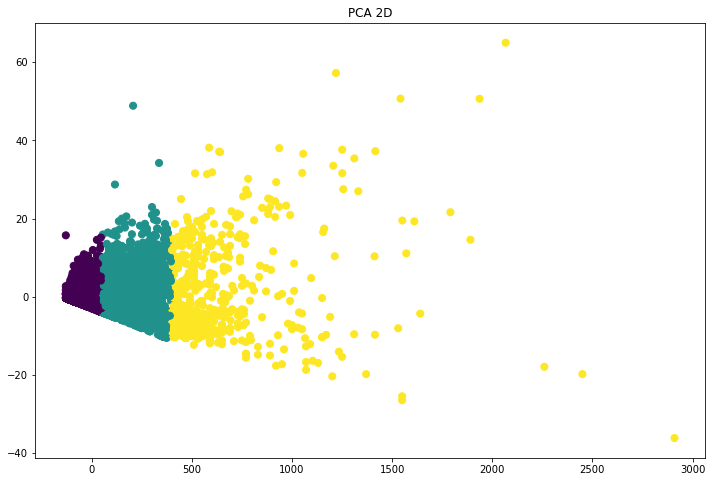

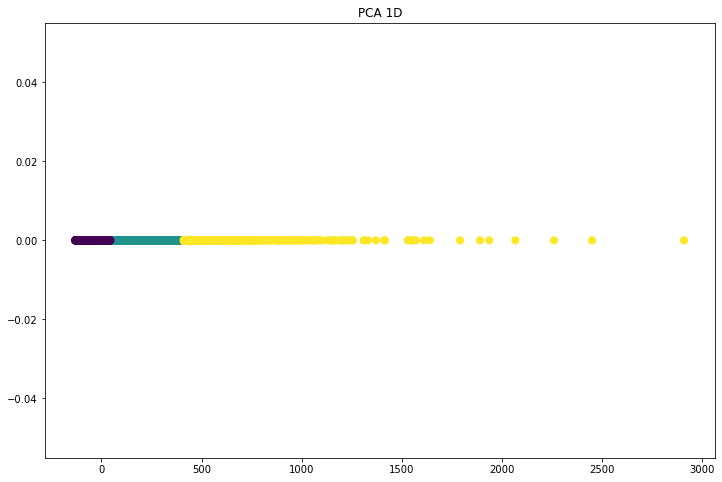

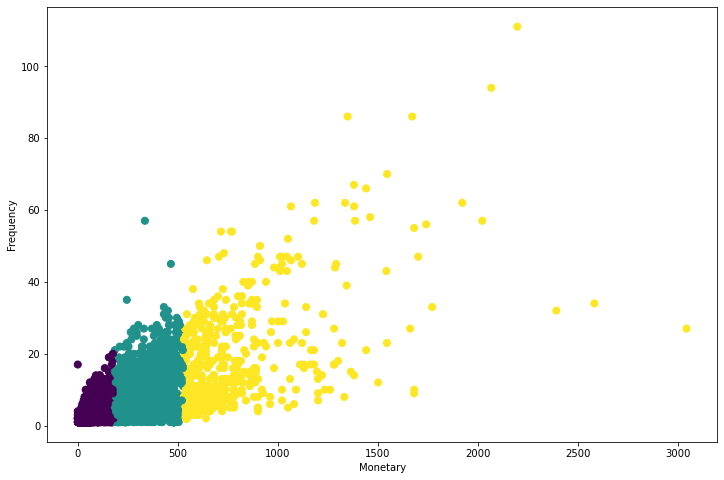

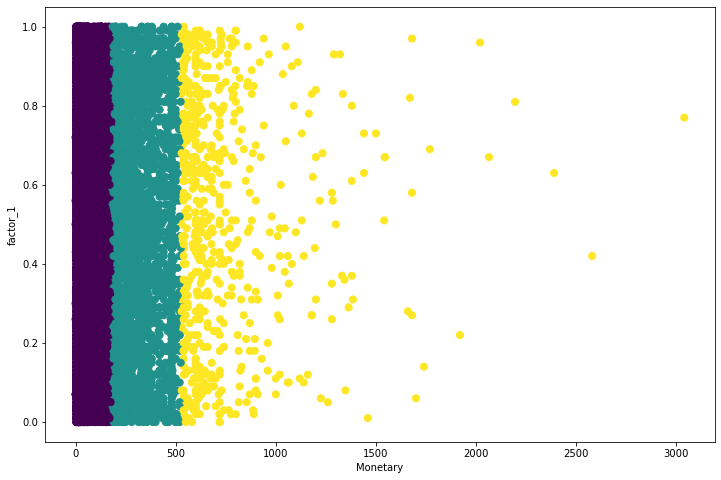

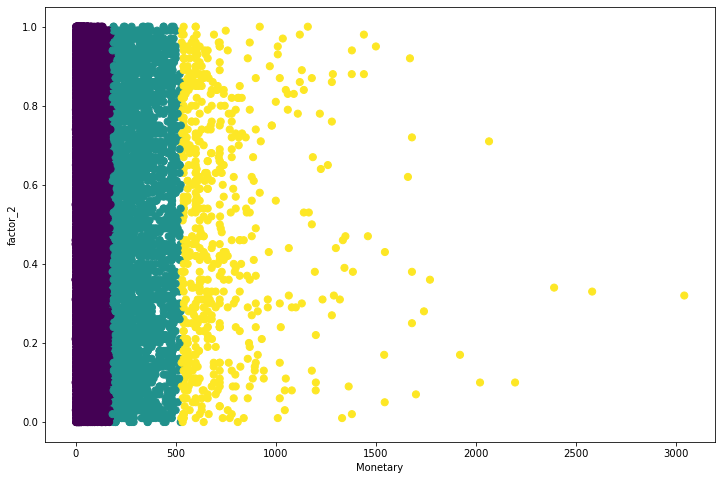

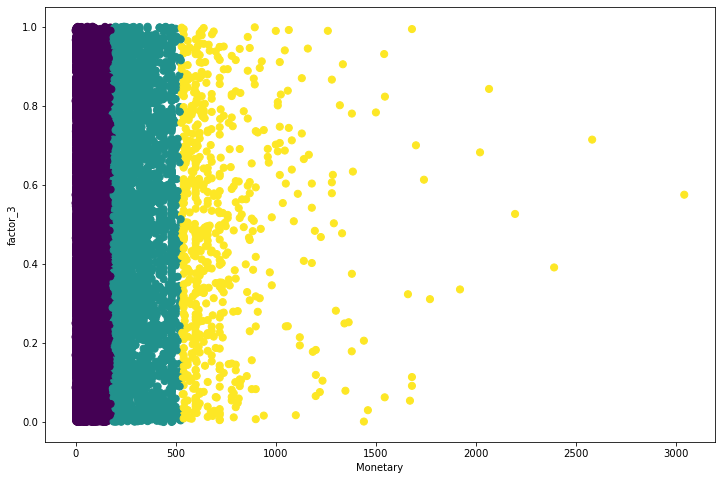

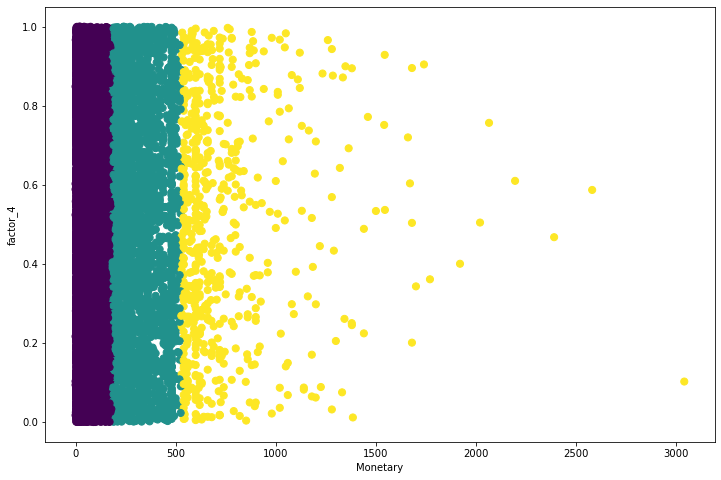

In [157]:
features = ['Monetary', 'Frequency']

kmeans = KMeans(n_clusters=3, random_state=17)
kmeans.fit(segment[features].values)

# Визуализация с использованием PCA 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(segment[not_obj_features].values)
segment['pca-one'] = pca_result[:,0]
segment['pca-two'] = pca_result[:,1] 
segment['pca-three'] = pca_result[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=segment["pca-one"], 
    ys=segment["pca-two"], 
    zs=segment["pca-three"], 
    c=kmeans.labels_, 
    cmap='viridis'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('PCA 3D')

# Визуализация с использованием PCA 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(segment[features].values)
plt.figure(figsize=(12,8))
plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA 2D')

# Визуализация с использованием PCA 1D
pca = PCA(n_components=1)
pca_result = pca.fit_transform(segment[features].values)
plt.figure(figsize=(12,8))
plt.scatter(pca_result[:,0], np.zeros(pca_result.shape[0]), c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA 1D')

# Визуализация двух граф: Monetary и Frequency
plt.figure(figsize=(12,8))
plt.scatter(segment['Monetary'], segment['Frequency'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

# Визуализация двух граф: Monetary и factor_1
plt.figure(figsize=(12,8))
plt.scatter(segment['Monetary'], segment['factor_1'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('factor_1')

# Визуализация двух граф: Monetary и factor_2
plt.figure(figsize=(12,8))
plt.scatter(segment['Monetary'], segment['factor_2'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('factor_2')

# Визуализация двух граф: Monetary и factor_3
plt.figure(figsize=(12,8))
plt.scatter(segment['Monetary'], segment['factor_3'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('factor_3')

# Визуализация двух граф: Monetary и factor_4
plt.figure(figsize=(12,8))
plt.scatter(segment['Monetary'], segment['factor_4'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('factor_4')

Из метода главных компонент видно, что все свойства хорошо сводятся к одному 

In [158]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(segment[not_obj_features].values) #используем not_obj_features чтобы отобразить потом в 3D
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.99957113]


При одной компоненте практически полностью сохраняется полнота данных, их разнообразие 

Сравним методы кластеризации KMeans и AgglomerativeClustering

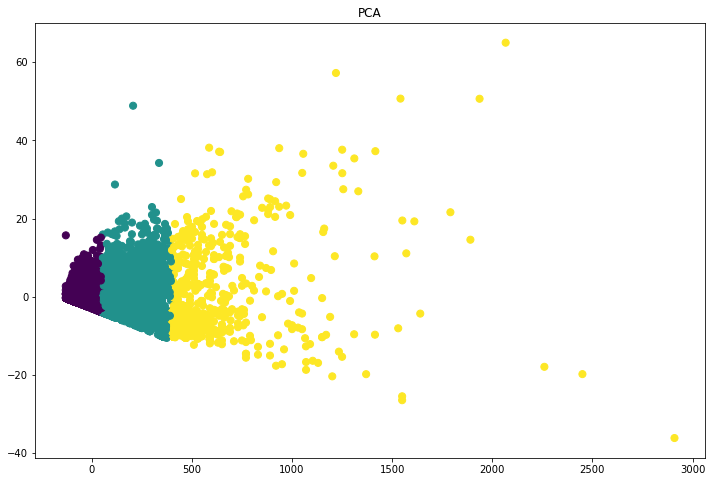

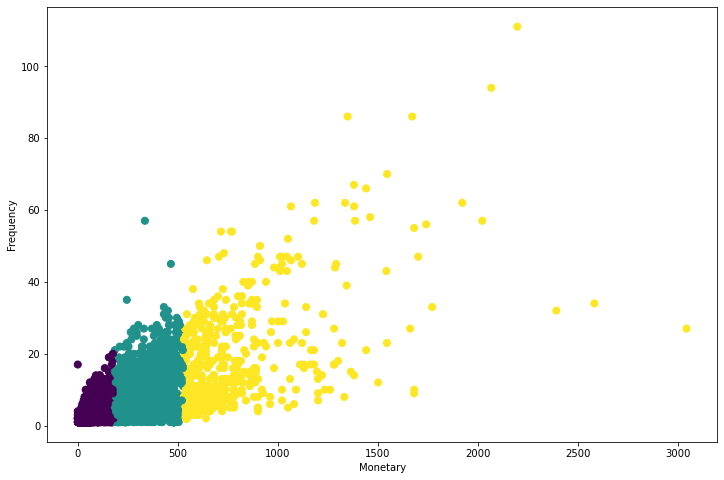

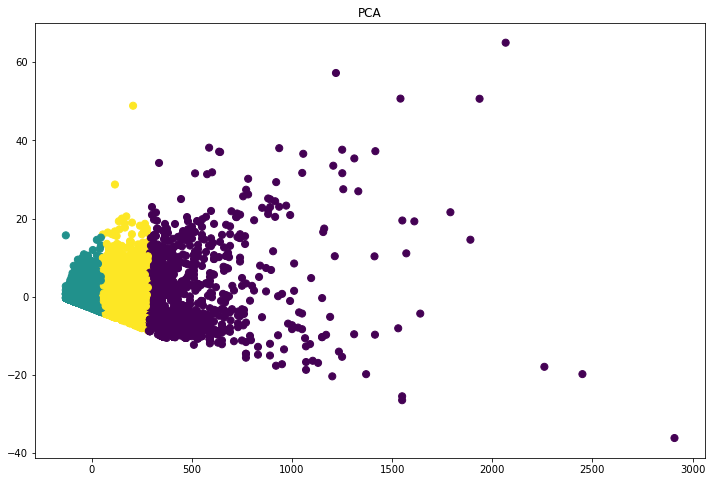

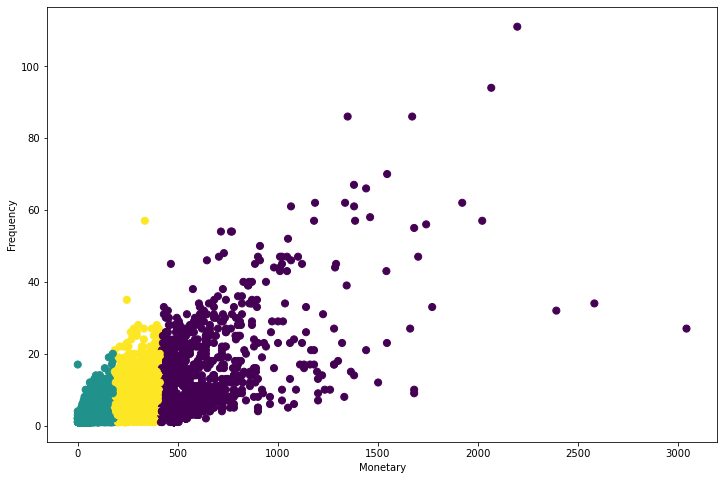

In [124]:
algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=17))

algorithms.append(AgglomerativeClustering(n_clusters=3))

for algo in algorithms:
    algo.fit(segment[features].values)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(segment[features].values)
    plt.figure(figsize=(12,8))
    plt.scatter(pca_result[:,0], pca_result[:,1], c=algo.labels_, s=50, cmap='viridis')
    plt.title('PCA')
    

    plt.figure(figsize=(12,8))
    plt.scatter(segment['Monetary'], segment['Frequency'], c=algo.labels_, s=50, cmap='viridis')
    plt.xlabel('Monetary')
    plt.ylabel('Frequency')

Ниже проверим изменяются ли средние значения факторов в сегментах, если меняется список свойст на которых проходит кластеризация KMeans

In [139]:
features1 = ['Monetary', 'Frequency', 'factor_1', 'factor_2', 'factor_3', 'factor_4']
features2 = ['Monetary', 'Frequency', 'factor_1', 'factor_2', 'factor_3']
features3 = ['Monetary', 'Frequency', 'factor_1', 'factor_2']
features4 = ['Monetary', 'Frequency', 'factor_1']
all_features = [features1, features2, features3, features4, features, ['Monetary'], ['Frequency'], ['factor_1']]

for feat in all_features:
    kmeans = KMeans(n_clusters=3, random_state=17)
    kmeans.fit(segment[feat].values)
    segment['test_labels'] = (kmeans.labels_)
    print(feat)
    print('Среднее значение Monetary 1 сегмента: ', segment[(segment['test_labels'] == 0)]['Monetary'].mean())
    print('Среднее значение Monetary 2 сегмента: ', segment[(segment['test_labels'] == 1)]['Monetary'].mean())
    print('Среднее значение Monetary 3 сегмента: ', segment[(segment['test_labels'] == 2)]['Monetary'].mean())
    print('Среднее значение Frequency 1 сегмента: ', segment[(segment['test_labels'] == 0)]['Frequency'].mean())
    print('Среднее значение Frequency 2 сегмента: ', segment[(segment['test_labels'] == 1)]['Frequency'].mean())
    print('Среднее значение Frequency 3 сегмента: ', segment[(segment['test_labels'] == 2)]['Frequency'].mean(), '\n')

['Monetary', 'Frequency', 'factor_1', 'factor_2', 'factor_3', 'factor_4']
Среднее значение Monetary 1 сегмента:  52.78817039334095
Среднее значение Monetary 2 сегмента:  309.3529062299293
Среднее значение Monetary 3 сегмента:  742.6661867088607
Среднее значение Frequency 1 сегмента:  2.4716827158478862
Среднее значение Frequency 2 сегмента:  7.246307000642261
Среднее значение Frequency 3 сегмента:  16.389240506329113 

['Monetary', 'Frequency', 'factor_1', 'factor_2', 'factor_3']
Среднее значение Monetary 1 сегмента:  52.78817039334095
Среднее значение Monetary 2 сегмента:  309.3529062299293
Среднее значение Monetary 3 сегмента:  742.6661867088607
Среднее значение Frequency 1 сегмента:  2.4716827158478862
Среднее значение Frequency 2 сегмента:  7.246307000642261
Среднее значение Frequency 3 сегмента:  16.389240506329113 

['Monetary', 'Frequency', 'factor_1', 'factor_2']
Среднее значение Monetary 1 сегмента:  52.78817039334095
Среднее значение Monetary 2 сегмента:  309.3529062299293
Ср

Видно, что средние практчески значения не меняются, если кластеризация происходит 6, 5, 4, 3 и 2 выбранных свойствах, а также незначительно меняется, если выбрано только свойство Monetary, но если выбирать любые другие свойства по одному, то средние значения сильно отличаются. 
Отсюда можно сделать вывод, что для кластеризации достаточно лишь свойства Monetary.

Посмотрим на средние значения при кластеризации методом AgglomerativeClustering.

In [125]:
aggClustering = AgglomerativeClustering(n_clusters=3)

In [128]:
aggClustering.fit(segment[features].values)

AgglomerativeClustering(n_clusters=3)

In [129]:
segment['labels2'] = (aggClustering.labels_)

In [130]:
print('Среднее значение Monetary 1 сегмента: ', segment[(segment['labels2'] == 0)]['Monetary'].mean())
print('Среднее значение Monetary 2 сегмента: ', segment[(segment['labels2'] == 1)]['Monetary'].mean())
print('Среднее значение Monetary 3 сегмента: ', segment[(segment['labels2'] == 2)]['Monetary'].mean())

Среднее значение Monetary 1 сегмента:  610.9464438943894
Среднее значение Monetary 2 сегмента:  52.79867237862097
Среднее значение Monetary 3 сегмента:  273.2101855507304


In [131]:
print('Среднее значение Frequency 1 сегмента: ', segment[(segment['labels2'] == 0)]['Frequency'].mean())
print('Среднее значение Frequency 2 сегмента: ', segment[(segment['labels2'] == 1)]['Frequency'].mean())
print('Среднее значение Frequency 3 сегмента: ', segment[(segment['labels2'] == 2)]['Frequency'].mean())

Среднее значение Frequency 1 сегмента:  12.408415841584159
Среднее значение Frequency 2 сегмента:  2.47156262749898
Среднее значение Frequency 3 сегмента:  7.06000789577576


Видно, что картина не сильно отличается от KMeans. Только первые два сегмента стали уже, и средние значения каждых кластеров уменьшились.